### Link
- https://data.wprdc.org/dataset/property-assessments/resource/518b583f-7cc8-4f60-94d0-174cc98310dc

In [111]:
#import the required modules
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

#import the data
data = pd.read_csv("518b583f-7cc8-4f60-94d0-174cc98310dc.csv")

#remove data that doesnt meet certian criteria
data = data[data['PROPERTYCITY'] == "PITTSBURGH"] 
data = data[data['SALEPRICE'] >= 10000] 
data = data[data['NEIGHDESC'] != ""] 
data = data[data['SALEDATE'] != ""] 


data.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
72269,PITTSBURGH,PA,11902,11902,09-27-1999,117500.0,NaN
356623,PITTSBURGH,PA,92604,MOUNT LEBANON TOWNSHIP,04-12-2018,270000.0,NaN
356036,PITTSBURGH,PA,92601,MOUNT LEBANON TOWNSHIP,07-06-2017,715000.0,NaN
511161,PITTSBURGH,PA,12102,WARD 21 - MANCHESTER,05-15-2019,25000.0,NaN
519040,PITTSBURGH,PA,81601,CHURCHILL BOROUGH,08-18-2017,263500.0,NaN


In [112]:
#convert date formats and get rid of more unnessecary data
def convert_to_year(dstr):
    return datetime.date(int(dstr.split("-")[2]), int(dstr.split("-")[0]), int(dstr.split("-")[1]))
def fix_desc(dstr):
    if(str(dstr).isdigit()):
        return "INVALID"
    return dstr
timeData = data
timeData['SALEDATE'] = timeData['SALEDATE'].apply(convert_to_year)
timeData['NEIGHDESC'] = timeData['NEIGHDESC'].apply(fix_desc)
timeData = timeData[timeData['NEIGHDESC'] != "INVALID"]

#define the dates that will be used as the bounds
cutoff1 = datetime.date(2010, 1, 1)
cutoff2 = datetime.date(2015, 1, 1)
cutoff3 = datetime.date(2020, 1, 1)

#split the list into a the before and after
data_old = timeData[timeData['SALEDATE'] >= cutoff1]
data_old = data_old[data_old['SALEDATE'] < cutoff2] 
values_old = data_old.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_old = values_old.sort_values()

data_new = timeData[timeData['SALEDATE'] >= cutoff2]
data_new = data_new[data_new['SALEDATE'] <= cutoff3]
values_new = data_new.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_new = values_new.sort_values()

In [113]:
data_old.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
515715,PITTSBURGH,PA,87403,WHITEHALL BOROUGH,2012-02-03,117500.0,NaN
92885,PITTSBURGH,PA,12102,WARD 21 - MANCHESTER,2012-07-09,192912.0,NaN
148890,PITTSBURGH,PA,81301,CASTLE SHANNON BOROUGH,2014-01-03,95500.0,NaN
547554,PITTSBURGH,PA,87302,PLEASANT HILLS BOROUGH,2014-06-04,137000.0,NaN
261051,PITTSBURGH,PA,87701,BALDWIN BOROUGH,2013-07-05,36500.0,NaN


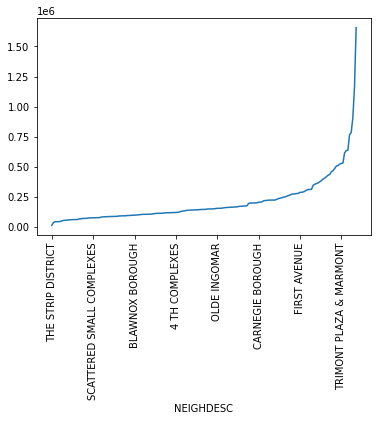

In [114]:
values_old.sort_values().plot(kind='line',rot=90)

In [115]:
data_new.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
237317,PITTSBURGH,PA,61W18,PENNSBURY VILLAGE,2016-09-02,80000.0,NaN
178809,PITTSBURGH,PA,83501,NaN,2019-06-16,120000.0,NaN
274587,PITTSBURGH,PA,54C35,RURAL,2018-08-27,25000.0,NaN
226872,PITTSBURGH,PA,87403,WHITEHALL BOROUGH,2015-08-11,299900.0,NaN
542338,PITTSBURGH,PA,93401,PENN HILLS TOWNSHIP,2018-10-31,28000.0,NaN


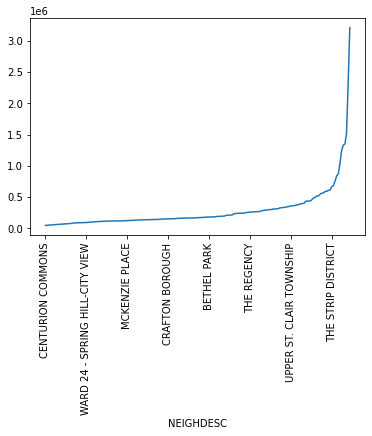

In [116]:
values_new.sort_values().plot(kind='line',rot=90)

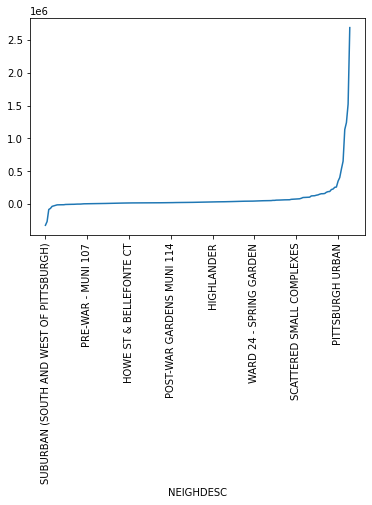

In [118]:
#calculate the list of how the property values have changed and get the highest ones
values_change = values_new-values_old
values_change = values_change.dropna()
values_change.sort_values().plot(kind='line',rot=90)

In [122]:
values_change.sort_values().tail(20)

NEIGHDESC
BEACON STREET                      1.382781e+05
FIRST AVENUE                       1.486667e+05
WARD 24 - TROY HILL                1.558835e+05
SHADYSIDE                          1.559814e+05
VILLAGE AT SHADYSIDE               1.595155e+05
BELLEFIELD                         1.779387e+05
STRIP LOFT                         1.877732e+05
POST WAR MUNI 107                  1.898065e+05
BEN AVON HEIGHTS                   2.195776e+05
WARD 22 - NORTH SHORE/ALLEGHENY    2.274137e+05
PIATT PLACE                        2.536384e+05
MUNI 119 CONDOS                    2.580625e+05
PITTSBURGH URBAN                   3.472241e+05
METROPOLITAN SAHDYSIDE             4.028365e+05
SERENDIPITY                        5.327000e+05
THE STRIP DISTRICT                 6.518360e+05
WARD 21 - MANCHESTER               1.133869e+06
WARD 25                            1.241094e+06
RURAL                              1.521922e+06
SUBURBAN (EAST OF PITTSBURGH)      2.687339e+06
Name: SALEPRICE, dtype: float6